## **Título**: Primer contacto con la api de TWITTER
---

<div class="alert alert-info" role="alert">
<p><strong>Algoritmos basicos API Twitter</strong></p>
<p><strong>Autor</strong>: Daniel Ivan Medina Barreras </p>
<p><strong>Fecha</strong>: 20200730</p>
<p></p>
<p><strong>Referencia</strong>: cap2.ipynb</p>
<p> <strong>Descripción</strong> : Primeros algoritmos mas basicos para usar el API de Twitter</p>
</div>

## <font size='5' color='blue'>Contenidos</font> 


* [PACKAGES](#twitter_packages)    
<br></br>
* [Twitter client](#twitter_client)  
<br></br>
* [Twitter_get_home_timeline](#twitter_get_home_timeline)    
<br></br>
* [Twitter get user timeline](#twitter_get_user_timeline)     
 <br></br>
* [Twitter streaming](#twitter_streaming)     
 <br></br>
* [Twitter hashtag frequency](#twitter_hashtag_frequency)
<br></br><br></br>

* [Twitter hashtag stats](#twitter_hashtag_stats)
<br></br><br></br>

* [Twitter mention frequency](#twitter_mention_frequency)
<br></br><br></br>

* [Twitter_term_frequency](#twitter_term_frequency)
<br></br><br></br>

* [Twitter term frequency graph](#twitter_term_frequency_graph)
<br></br><br></br>

* [Twitter time series](#twitter_time_series)




## 1. <a id='twitter_packages'>PACKAGES 📚 </a>
---

In [1]:
import os
import sys

import config
import a
import tweepy

In [2]:
from tweepy import API
from tweepy import OAuthHandler

### Librerías estándar de Python
---
**Descripción**

La instalación básica de Python viene con una muy completa librería de módulos para todo tipo de tareas, incluyendo acceso a ficheros y directorios, compresión de ficheros, ejecución recurrente (multihilo), email, html, xml, csv y un largo etcétera.

**Link**

[La biblioteca estándar de Python](https://docs.python.org/3/library/index.html)

### tweepy
---
**Instalación**

>``conda install -c conda-forge tweepy``  
>``conda install -c conda-forge/label/cf201901 tweepy``  
>``conda install -c conda-forge/label/cf202003 tweepy ``  

**Descripción**

Tweepy es una biblioteca de Python para acceder a la API de Twitter.  

Es ideal para la automatización simple y la creación de bots de Twitter. 

Tweepy tiene muchas características.
 
**Link**

[tweepy](https://www.tweepy.org/)

## 2. <a id='twitter_client'>twitter client🐦</a>
---

In [10]:
def get_twitter_auth():
    """Setup Twitter authentication.

    Return: tweepy.OAuthHandler object
    """
    try:
        consumer_key = config.consumer_key
        consumer_secret = config.consumer_secret
        access_token = config.access_token
        access_secret = config.access_secret
    except NameError:
        print("TWITTER_* environment variables not set\n")
    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_secret)
    return auth

In [11]:
def get_twitter_client():
    """Setup Twitter API client.

    Return: tweepy.API object
    """
    auth = get_twitter_auth()
    client = API(auth)
    return client

**TEST API**

In [12]:
api = get_twitter_client()

In [15]:
for status in tweepy.Cursor(api.home_timeline).items(10):
        # Process a single status
        print(status.text)

cabramaravilla te amo
skain comunista https://t.co/EFX3PFPbPb
The impacts of COVID-19 are driving worrying increases in malnutrition and health outcomes. However, there are clea… https://t.co/eDjJJPt535
just tried to physically blow a text notification away on my phone so that’s where I’m at
The second to last piece of hardware for our #Artemis I flight around the Moon has arrived at @NASAKennedy in Flori… https://t.co/JnQiOJVyEw
Learn more about ODSC West 2020’s six specialized learning paths to ensure that you can easily select the courses t… https://t.co/bz8HtSBQPn
@SkainLoL https://t.co/uTjfaFhCLS
Ty elbread @BriiHD ahora a mi flor tambien le gusta el pan como a ti https://t.co/2HyddErHyv
RT @Quickshot: The LEC onair talent team did not simply share messages on social media and walk away. We raised our concerns internally, me…
RT @trevormundel: The @WorldBank’s support of @CEPIvaccines and @gavi is instrumental to the research and development of the #COVID19 vacci…


## 3. <a id='twitter_get_home_timeline'>Twitter get home timeline 🏠 </a>
---

In [17]:
import json
from tweepy import Cursor

client = get_twitter_client()

with open('./json/home_timeline.jsonl', 'w') as f:
    for page in Cursor(client.home_timeline, count=200, include_rts=True).pages(4):
        for status in page:
            # Process a single status
            f.write(json.dumps(status._json)+"\n")

**La ejecución de este código generará un archivo home_timeline.json en unos momentos**

En este código, itera a través de cuatro páginas, que contienen 200 tweets, cada una según lo declarado en el argumento de conteo del cursor. La razón de esto es una limitación dada por Twitter: solo podemos recuperar hasta los 800 tweets más recientes de nuestra línea de tiempo local.
Si recuperamos tweets de una línea de tiempo de usuario específica, es decir, usando el método `user_timeline` en lugar de `home_timeline`, este límite aumenta a 3.200.

## 4. <a id='twitter_get_user_timeline'>Twitter get user timeline  👤</a>
---

In [18]:
# @BarrerasDaniel2

In [19]:
import sys
import json
from tweepy import Cursor

In [20]:
def usage():
    print("Usage:")
    print("{} <username>".format(user))

In [21]:
user = str(input("Ingresa un usuario para obtener sus tweets: "))

Ingresa un usuario para obtener sus tweets: @BarrerasDaniel2


In [22]:
usage()

Usage:
@BarrerasDaniel2 <username>


In [23]:
client = get_twitter_client()

fname = "./json/user_timeline_{}.jsonl".format(user)
with open(fname, 'w') as f:
    for page in Cursor(client.user_timeline, screen_name=user, count=200).pages(16):
        for status in page:
            f.write(json.dumps(status._json)+"\n")

**revisar la carpeta 'json'**

### El formato JSON_Lines

El archivo en el ejemplo anterior tiene una extensión .jsonl en lugar de solo.json.
De hecho, este archivo está en el formato [JSON_Lines](http://jsonlines.org/), lo que significa que cada línea del archivo es un documento JSON válido. Intentar cargar todo el contenido de este archivo con, por ejemplo, `json.loads()` recaudará ValueError ya que todo el contenido no es un documento JSON válido. Por el contrario, si usamos funciones que esperan documentos JSON válidos, necesitamos procesar una línea. El formato de líneas JSON es particularmente adecuado para el procesamiento a gran escala: muchos marcos de big data permiten a los desarrolladores dividir fácilmente el archivo de entrada en fragmentos que pueden ser procesados en paralelo por diferentes trabajadores.

## La estructura de un tweet

<html>

<head>
<meta http-equiv=Content-Type content="text/html; charset=windows-1252">
<meta name=Generator content="Microsoft Word 15 (filtered)">
<style>
<!--
 /* Font Definitions */
 @font-face
	{font-family:"Cambria Math";
	panose-1:2 4 5 3 5 4 6 3 2 4;}
@font-face
	{font-family:Calibri;
	panose-1:2 15 5 2 2 2 4 3 2 4;}
@font-face
	{font-family:PalatinoLinotype-Bold;
	panose-1:0 0 0 0 0 0 0 0 0 0;}
@font-face
	{font-family:FreeMono;
	panose-1:0 0 0 0 0 0 0 0 0 0;}
@font-face
	{font-family:PalatinoLinotype-Roman;
	panose-1:0 0 0 0 0 0 0 0 0 0;}
 /* Style Definitions */
 p.MsoNormal, li.MsoNormal, div.MsoNormal
	{margin-top:0cm;
	margin-right:0cm;
	margin-bottom:8.0pt;
	margin-left:0cm;
	line-height:107%;
	font-size:11.0pt;
	font-family:"Calibri",sans-serif;}
.MsoChpDefault
	{font-family:"Calibri",sans-serif;}
.MsoPapDefault
	{margin-bottom:8.0pt;
	line-height:107%;}
@page WordSection1
	{size:612.0pt 792.0pt;
	margin:70.85pt 3.0cm 70.85pt 3.0cm;}
div.WordSection1
	{page:WordSection1;}
-->
</style>

</head>

<body lang=ES-MX>

<div class=WordSection1>

<table class=MsoTableGrid border=1 cellspacing=0 cellpadding=0
 style='border-collapse:collapse;border:none'>
 <tr>
  <td width=294 valign=top style='width:220.7pt;border:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;margin-bottom:.0001pt;line-height:
  normal'><b><span style='font-size:10.0pt;font-family:PalatinoLinotype-Bold'>Attribute
  Name</span></b></p>
  </td>
  <td width=294 valign=top style='width:220.7pt;border:solid windowtext 1.0pt;
  border-left:none;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;margin-bottom:.0001pt;line-height:
  normal'><b><span style='font-size:10.0pt;font-family:PalatinoLinotype-Bold'>Description</span></b></p>
  </td>
 </tr>
 <tr>
  <td width=294 valign=top style='width:220.7pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;margin-bottom:.0001pt;line-height:
  normal'><span lang=EN-US style='font-size:10.0pt;font-family:FreeMono'>_json </span></p>
  </td>
  <td width=294 valign=top style='width:220.7pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;margin-bottom:.0001pt;line-height:
  normal'>Este es un diccionario con la respuesta JSON del estado</p>
  </td>
 </tr>
 <tr>
  <td width=294 valign=top style='width:220.7pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;margin-bottom:.0001pt;line-height:
  normal'><span lang=EN-US style='font-size:10.0pt;font-family:FreeMono'>author
  </span></p>
  </td>
  <td width=294 valign=top style='width:220.7pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;margin-bottom:.0001pt;line-height:
  normal'>Esta es la instancia de tweepy.models.User del tweet</p>
  </td>
 </tr>
 <tr>
  <td width=294 valign=top style='width:220.7pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;margin-bottom:.0001pt;line-height:
  normal'><span lang=EN-US style='font-size:10.0pt;font-family:FreeMono'>contributors
  </span></p>
  </td>
  <td width=294 valign=top style='width:220.7pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;margin-bottom:.0001pt;line-height:
  normal'>Esta es una lista de contribuyentes, si la función está habilitada</p>
  </td>
 </tr>
 <tr>
  <td width=294 valign=top style='width:220.7pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;margin-bottom:.0001pt;line-height:
  normal'><span lang=EN-US style='font-size:10.0pt;font-family:FreeMono'>coordinates
  </span></p>
  </td>
  <td width=294 valign=top style='width:220.7pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;margin-bottom:.0001pt;line-height:
  normal'>Este es el diccionario de coordenadas en el formato GeoJSON</p>
  </td>
 </tr>
 <tr>
  <td width=294 valign=top style='width:220.7pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;margin-bottom:.0001pt;line-height:
  normal'><span lang=EN-US style='font-size:10.0pt;font-family:FreeMono'>created_at
  </span></p>
  </td>
  <td width=294 valign=top style='width:220.7pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;margin-bottom:.0001pt;line-height:
  normal'>Esta es la instancia de datetime.datetime del tiempo de creación de
  tweet</p>
  </td>
 </tr>
 <tr>
  <td width=294 valign=top style='width:220.7pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;margin-bottom:.0001pt;line-height:
  normal'><span lang=EN-US style='font-size:10.0pt;font-family:FreeMono'>entities
  </span></p>
  </td>
  <td width=294 valign=top style='width:220.7pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;margin-bottom:.0001pt;line-height:
  normal'>Este es un diccionario de URL, hashtags y menciones en los tweets</p>
  </td>
 </tr>
 <tr>
  <td width=294 valign=top style='width:220.7pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;margin-bottom:.0001pt;line-height:
  normal'><span lang=EN-US style='font-size:10.0pt;font-family:FreeMono'>favorite_count
  </span></p>
  </td>
  <td width=294 valign=top style='width:220.7pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;margin-bottom:.0001pt;line-height:
  normal'><span style='font-size:10.0pt;font-family:PalatinoLinotype-Roman'>Esta
  es la cantidad de veces que el tweet ha sido favorecido</span></p>
  </td>
 </tr>
 <tr>
  <td width=294 valign=top style='width:220.7pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;margin-bottom:.0001pt;line-height:
  normal;text-autospace:none'><span lang=EN-US style='font-size:10.0pt;
  font-family:FreeMono'>favorited </span></p>
  </td>
  <td width=294 valign=top style='width:220.7pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;margin-bottom:.0001pt;line-height:
  normal;text-autospace:none'><span style='font-size:10.0pt;font-family:PalatinoLinotype-Roman'>Esto
  marca si el usuario autenticado ha favorecido el tweet</span></p>
  </td>
 </tr>
 <tr>
  <td width=294 valign=top style='width:220.7pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;margin-bottom:.0001pt;line-height:
  normal;text-autospace:none'><span lang=EN-US style='font-size:10.0pt;
  font-family:FreeMono'>geo </span></p>
  </td>
  <td width=294 valign=top style='width:220.7pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;margin-bottom:.0001pt;line-height:
  normal;text-autospace:none'><span style='font-size:10.0pt;font-family:PalatinoLinotype-Roman'>Estas
  son las coordenadas (en desuso, use las coordenadas en su lugar)</span></p>
  </td>
 </tr>
 <tr>
  <td width=294 valign=top style='width:220.7pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;margin-bottom:.0001pt;line-height:
  normal;text-autospace:none'><span lang=EN-US style='font-size:10.0pt;
  font-family:FreeMono'>id </span></p>
  </td>
  <td width=294 valign=top style='width:220.7pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;margin-bottom:.0001pt;line-height:
  normal;text-autospace:none'><span style='font-size:10.0pt;font-family:PalatinoLinotype-Roman'>Esta
  es la identificación única de los tweets como gran número entero</span></p>
  </td>
 </tr>
 <tr>
  <td width=294 valign=top style='width:220.7pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;margin-bottom:.0001pt;line-height:
  normal;text-autospace:none'><span lang=EN-US style='font-size:10.0pt;
  font-family:FreeMono'>id_str </span></p>
  </td>
  <td width=294 valign=top style='width:220.7pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;margin-bottom:.0001pt;line-height:
  normal;text-autospace:none'><span style='font-size:10.0pt;font-family:PalatinoLinotype-Roman'>Esta
  es la identificación única del tweet como cadena</span></p>
  </td>
 </tr>
 <tr>
  <td width=294 valign=top style='width:220.7pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;margin-bottom:.0001pt;line-height:
  normal;text-autospace:none'><span lang=EN-US style='font-size:10.0pt;
  font-family:FreeMono'>in_reply_to_screen_name </span></p>
  </td>
  <td width=294 valign=top style='width:220.7pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;margin-bottom:.0001pt;line-height:
  normal;text-autospace:none'><span style='font-size:10.0pt;font-family:PalatinoLinotype-Roman'>Este
  es el nombre de usuario del estado al que responde el tweet</span></p>
  </td>
 </tr>
 <tr>
  <td width=294 valign=top style='width:220.7pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;margin-bottom:.0001pt;line-height:
  normal;text-autospace:none'><span lang=EN-US style='font-size:10.0pt;
  font-family:FreeMono'>in_reply_to_status_id </span></p>
  </td>
  <td width=294 valign=top style='width:220.7pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;margin-bottom:.0001pt;line-height:
  normal;text-autospace:none'><span style='font-size:10.0pt;font-family:PalatinoLinotype-Roman'>Este
  es el ID de estado del estado al que responde el tweet, como un entero grande</span></p>
  </td>
 </tr>
 <tr>
  <td width=294 valign=top style='width:220.7pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;margin-bottom:.0001pt;line-height:
  normal;text-autospace:none'><span lang=EN-US style='font-size:10.0pt;
  font-family:FreeMono'>in_reply_to_status_id_str </span></p>
  </td>
  <td width=294 valign=top style='width:220.7pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;margin-bottom:.0001pt;line-height:
  normal;text-autospace:none'><span style='font-size:10.0pt;font-family:PalatinoLinotype-Roman'>Este
  es el ID de estado del estado al que responde el tweet, como cadena</span></p>
  </td>
 </tr>
 <tr>
  <td width=294 valign=top style='width:220.7pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;margin-bottom:.0001pt;line-height:
  normal;text-autospace:none'><span lang=EN-US style='font-size:10.0pt;
  font-family:FreeMono'>in_reply_to_user_id </span></p>
  </td>
  <td width=294 valign=top style='width:220.7pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;margin-bottom:.0001pt;line-height:
  normal;text-autospace:none'><span style='font-size:10.0pt;font-family:PalatinoLinotype-Roman'>Esta
  es la ID de usuario del estado al que responde el tweet, como un entero
  grande</span></p>
  </td>
 </tr>
 <tr>
  <td width=294 valign=top style='width:220.7pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;margin-bottom:.0001pt;line-height:
  normal;text-autospace:none'><span lang=EN-US style='font-size:10.0pt;
  font-family:FreeMono'>in_reply_to_user_id_str </span></p>
  </td>
  <td width=294 valign=top style='width:220.7pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;margin-bottom:.0001pt;line-height:
  normal;text-autospace:none'><span style='font-size:10.0pt;font-family:PalatinoLinotype-Roman'>Esta
  es la ID de usuario del estado al que responde el tweet, como cadena</span></p>
  </td>
 </tr>
 <tr>
  <td width=294 valign=top style='width:220.7pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;margin-bottom:.0001pt;line-height:
  normal;text-autospace:none'><span lang=EN-US style='font-size:10.0pt;
  font-family:FreeMono'>is_quote_status </span></p>
  </td>
  <td width=294 valign=top style='width:220.7pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;margin-bottom:.0001pt;line-height:
  normal;text-autospace:none'><span style='font-size:10.0pt;font-family:PalatinoLinotype-Roman'>Esto
  marca si el tweet es una cita (es decir, contiene otro tweet)</span></p>
  </td>
 </tr>
 <tr>
  <td width=294 valign=top style='width:220.7pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;margin-bottom:.0001pt;line-height:
  normal;text-autospace:none'><span lang=EN-US style='font-size:10.0pt;
  font-family:FreeMono'>lang </span></p>
  </td>
  <td width=294 valign=top style='width:220.7pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;margin-bottom:.0001pt;line-height:
  normal;text-autospace:none'><span style='font-size:10.0pt;font-family:PalatinoLinotype-Roman'>Esta
  es la cadena con el código de idioma del tweet</span></p>
  </td>
 </tr>
 <tr>
  <td width=294 valign=top style='width:220.7pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;margin-bottom:.0001pt;line-height:
  normal;text-autospace:none'><span lang=EN-US style='font-size:10.0pt;
  font-family:FreeMono'>place </span></p>
  </td>
  <td width=294 valign=top style='width:220.7pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;margin-bottom:.0001pt;line-height:
  normal;text-autospace:none'><span style='font-size:10.0pt;font-family:PalatinoLinotype-Roman'>Esta
  es la instancia tweepy.models.Place del lugar adjunto al tweet</span></p>
  </td>
 </tr>
 <tr>
  <td width=294 valign=top style='width:220.7pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;margin-bottom:.0001pt;line-height:
  normal;text-autospace:none'><span lang=EN-US style='font-size:10.0pt;
  font-family:FreeMono'>possibly_sensitive </span></p>
  </td>
  <td width=294 valign=top style='width:220.7pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;margin-bottom:.0001pt;line-height:
  normal;text-autospace:none'><span style='font-size:10.0pt;font-family:PalatinoLinotype-Roman'>Esto
  marca si el tweet contiene URL con material posiblemente sensible</span></p>
  </td>
 </tr>
 <tr>
  <td width=294 valign=top style='width:220.7pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;margin-bottom:.0001pt;line-height:
  normal;text-autospace:none'><span lang=EN-US style='font-size:10.0pt;
  font-family:FreeMono'>retweet_count </span></p>
  </td>
  <td width=294 valign=top style='width:220.7pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;margin-bottom:.0001pt;line-height:
  normal;text-autospace:none'><span style='font-size:10.0pt;font-family:PalatinoLinotype-Roman'>Este
  es el número de veces que el estado ha sido retuiteado</span></p>
  </td>
 </tr>
 <tr>
  <td width=294 valign=top style='width:220.7pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;margin-bottom:.0001pt;line-height:
  normal;text-autospace:none'><span lang=EN-US style='font-size:10.0pt;
  font-family:FreeMono'>retweeted </span></p>
  </td>
  <td width=294 valign=top style='width:220.7pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;margin-bottom:.0001pt;line-height:
  normal;text-autospace:none'><span style='font-size:10.0pt;font-family:PalatinoLinotype-Roman'>Esto
  marca si el estado es un retweet</span></p>
  </td>
 </tr>
 <tr>
  <td width=294 valign=top style='width:220.7pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;margin-bottom:.0001pt;line-height:
  normal;text-autospace:none'><span lang=EN-US style='font-size:10.0pt;
  font-family:FreeMono'>source </span></p>
  </td>
  <td width=294 valign=top style='width:220.7pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;margin-bottom:.0001pt;line-height:
  normal;text-autospace:none'><span style='font-size:10.0pt;font-family:PalatinoLinotype-Roman'>Esta
  es la cadena que describe la herramienta utilizada para publicar el estado.</span></p>
  </td>
 </tr>
 <tr>
  <td width=294 valign=top style='width:220.7pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;margin-bottom:.0001pt;line-height:
  normal;text-autospace:none'><span lang=EN-US style='font-size:10.0pt;
  font-family:FreeMono'>text </span></p>
  </td>
  <td width=294 valign=top style='width:220.7pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;margin-bottom:.0001pt;line-height:
  normal;text-autospace:none'><span style='font-size:10.0pt;font-family:PalatinoLinotype-Roman'>Esta
  es la cadena con el contenido del estado</span></p>
  </td>
 </tr>
 <tr>
  <td width=294 valign=top style='width:220.7pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;margin-bottom:.0001pt;line-height:
  normal;text-autospace:none'><span lang=EN-US style='font-size:10.0pt;
  font-family:FreeMono'>truncated </span></p>
  </td>
  <td width=294 valign=top style='width:220.7pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;margin-bottom:.0001pt;line-height:
  normal;text-autospace:none'><span style='font-size:10.0pt;font-family:PalatinoLinotype-Roman'>Esto
  marca si el estado se truncó (por ejemplo, retuitear más de 140 caracteres)</span></p>
  </td>
 </tr>
 <tr>
  <td width=294 valign=top style='width:220.7pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;margin-bottom:.0001pt;line-height:
  normal;text-autospace:none'><span lang=EN-US style='font-size:10.0pt;
  font-family:FreeMono'>user </span></p>
  </td>
  <td width=294 valign=top style='width:220.7pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;margin-bottom:.0001pt;line-height:
  normal;text-autospace:none'><span style='font-size:10.0pt;font-family:PalatinoLinotype-Roman'>Esta
  es la instancia tweepy.models.User del autor del tweet (en desuso, use el
  autor en su lugar)</span></p>
  </td>
 </tr>
</table>

<p class=MsoNormal>&nbsp;</p>

</div>

</body>

</html>


## 5. <a id='twitter_streaming'>Twitter streaming  🎞️</a>
---

In [12]:
import sys
import string
import time
from tweepy import Stream
from tweepy.streaming import StreamListener

In [13]:
class CustomListener(StreamListener):
    """Custom StreamListener for streaming Twitter data."""

    def __init__(self, fname):
        safe_fname = format_filename(fname)
        self.outfile = "./json/stream_%s.jsonl" % safe_fname

    def on_data(self, data):
        try:
            with open(self.outfile, 'a') as f:
                f.write(data)
                return True
        except BaseException as e:
            sys.stderr.write("Error on_data: {}\n".format(e))
            time.sleep(5)
        return True

    def on_error(self, status):
        if status == 420:
            sys.stderr.write("Rate limit exceeded\n".format(status))
            return False
        else:
            sys.stderr.write("Error {}\n".format(status))
            return True

In [14]:
def format_filename(fname):
    """Convert fname into a safe string for a file name.

    Return: string
    """
    return ''.join(convert_valid(one_char) for one_char in fname)

In [15]:
def convert_valid(one_char):
    """Convert a character into '_' if "invalid".

    Return: string
    """
    valid_chars = "-_.%s%s" % (string.ascii_letters, string.digits)
    if one_char in valid_chars:
        return one_char
    else:
        return '_'

---
Cuando ejecutamos el script siguiente, tenemos que proporcionar argumentos. Estos argumentos, separados por un espacio en blanco, serán las palabras clave utilizadas por el oyente para descargar tweets.

In [17]:
query = str(input("Palabras clabe: "))

Palabras clabe: #tenis


In [27]:
query_fname = ' '.join(query) # string
auth = get_twitter_auth()
twitter_stream = Stream(auth, CustomListener(query_fname))
twitter_stream.filter(track=query, is_async=True)

**Ir a la carpeta json y actualizar para ver como funciona**

## 6. <a id='twitter_hashtag_frequency'>Twitter hashtag frequency 🔣</a>
---

In [37]:
import sys
from collections import Counter
import json

In [38]:
def get_hashtags(tweet):
    entities = tweet.get('entities', {})
    hashtags = entities.get('hashtags', [])
    return [tag['text'].lower() for tag in hashtags]

Este script toma el nombre de un archivo `.jsonl` como argumento de la línea de comando y lee su contenido, una línea a la vez. Como cada línea contiene un documento JSON, carga el documento en la variable de tweet y utiliza la función auxiliar `get_hashtags()` para extraer una lista de hashtags. Este tipo de entidades se almacenan en la variable hashtags, que se declara como colecciones. Contador, un tipo especial de diccionario que se utiliza para contar objetos hashaable, en nuestro caso, cadenas. El contador contiene las cadenas como teclas del diccionario y su frecuencia respectiva como valores.

In [40]:
fname = str(input("Dame la ruta de el '.jsonl' que extraimos antes: "))

Dame la ruta de el '.jsonl' que extraimos antes: ./json/user_timeline_@EvilAFM.jsonl


In [41]:
with open(fname, 'r') as f:
    hashtags = Counter()
    for line in f:
        tweet = json.loads(line)
        hashtags_in_tweet = get_hashtags(tweet)
        hashtags.update(hashtags_in_tweet)
    for tag, count in hashtags.most_common(20):
        print("{}: {}".format(tag, count))

streamingsolidario: 2
humor: 1
quedateencasa: 1
ad: 1
diainternacionaldelgato: 1
keepsmiling: 1
jedifallenorder: 1


## 7. <a id='twitter_hashtag_stats'>Twitter hashtag stats 📈</a>
---

In [42]:
import sys
from collections import defaultdict
import json

In [43]:
def get_hashtags(tweet):
    entities = tweet.get('entities', {})
    hashtags = entities.get('hashtags', [])
    return [tag['text'].lower() for tag in hashtags]

In [44]:
def usage():
    fname = str(input("Dame la ruta de el '.jsonl' que extraimos antes: "))
    print("Usage:")
    print("python {} <filename.jsonl>".format(fname))
    return fname

In [45]:
fname = usage()

Dame la ruta de el '.jsonl' que extraimos antes: ./json/user_timeline_@EvilAFM.jsonl
Usage:
python ./json/user_timeline_@EvilAFM.jsonl <filename.jsonl>


In [46]:
with open(fname, 'r') as f:
    hashtag_count = defaultdict(int)
    for line in f:
        tweet = json.loads(line)
        hashtags_in_tweet = get_hashtags(tweet)
        n_of_hashtags = len(hashtags_in_tweet)
        hashtag_count[n_of_hashtags] += 1
        
    tweets_with_hashtags = sum([count for n_of_tags, count in hashtag_count.items() if n_of_tags > 0])
    tweets_no_hashtags = hashtag_count[0]
    tweets_total = tweets_no_hashtags + tweets_with_hashtags
    tweets_with_hashtags_percent = "%.2f" % (tweets_with_hashtags / tweets_total * 100)
    tweets_no_hashtags_percent = "%.2f" % (tweets_no_hashtags / tweets_total * 100)
    print("{} tweets without hashtags ({}%)".format(tweets_no_hashtags, tweets_no_hashtags_percent))
    print("{} tweets with at least one hashtag ({}%)".format(tweets_with_hashtags, tweets_with_hashtags_percent))

    for tag_count, tweet_count in hashtag_count.items():
        if tag_count > 0:
            percent_total = "%.2f" % (tweet_count / tweets_total * 100)
            percent_elite = "%.2f" % (tweet_count / tweets_with_hashtags * 100)
            print("{} tweets with {} hashtags ({}% total, {}% elite)".format(tweet_count,
                                                                                tag_count,
                                                                                percent_total,
                                                                                percent_elite))

3192 tweets without hashtags (99.75%)
8 tweets with at least one hashtag (0.25%)
8 tweets with 1 hashtags (0.25% total, 100.00% elite)


## 8. <a id='twitter_mention_frequency'>Twitter mention frequency 📊</a>
---

In [47]:
import sys
from collections import Counter
import json

In [48]:
def get_mentions(tweet):
    entities = tweet.get('entities', {})
    hashtags = entities.get('user_mentions', [])
    return [tag['screen_name'] for tag in hashtags]

In [49]:
def usage():
    fname = str(input("Dame la ruta de el '.jsonl' que extraimos antes: "))
    print("Usage:")
    print("python {} <filename.jsonl>".format(fname))
    return fname

In [50]:
fname = usage()

Dame la ruta de el '.jsonl' que extraimos antes: ./json/user_timeline_@EvilAFM.jsonl
Usage:
python ./json/user_timeline_@EvilAFM.jsonl <filename.jsonl>


In [51]:
with open(fname, 'r') as f:
    users = Counter()
    for line in f:
        tweet = json.loads(line)
        mentions_in_tweet = get_mentions(tweet)
        users.update(mentions_in_tweet)
    for user, count in users.most_common(20):
        print("{}: {}".format(user, count))


Felipez360: 158
inyustificado: 99
Caith_Sith: 87
KrITIK4L: 50
YouTube: 43
DayoScript: 41
fercardenete: 39
DualGG: 36
BriiHD: 36
Sh4rin_Papito: 29
F_DaVid_A: 28
Outconsumer: 27
DriDG7: 26
ElRichMC: 24
Pazos_64: 23
RicardoKails: 18
EricRod_LYV: 18
nachoMoL: 18
sixteenjune: 17
KuentinLoL: 16


## 9. <a id='twitter_term_frequency'>Twitter term frequency 📊</a>
---

Abra una terminal y pegue el siguiente comando:   
> `pip install --user -U nltk`

Abra una terminal y escriba lo siguiente
> `python`   
>`import nltk`   
>`nltk.download('stopwords')`


In [52]:
import sys
import string
import json
from collections import Counter
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords

In [53]:
def process(text, tokenizer=TweetTokenizer(), stopwords=[]):
    """Process the text of a tweet:
    - Lowercase
    - Tokenize
    - Stopword removal
    - Digits removal

    Return: list of strings
    """
    text = text.lower()
    tokens = tokenizer.tokenize(text)
    # If we want to normalize contraction, uncomment this
    # tokens = normalize_contractions(tokens)
    return [tok for tok in tokens if tok not in stopwords and not tok.isdigit()]

In [54]:
def normalize_contractions(tokens):
    """Example of normalization for English contractions.

    Return: generator
    """
    token_map = {
        "i'm": "i am",
        "you're": "you are",
        "it's": "it is",
        "we're": "we are",
        "we'll": "we will",
    }
    for tok in tokens:
        if tok in token_map.keys():
            for item in token_map[tok].split():
                yield item
        else:
            yield tok

In [55]:
def usage():
    fname = str(input("Dame la ruta de el '.jsonl' que extraimos antes: "))
    print("Usage:")
    print("python {} <filename.jsonl>".format(fname))
    return fname

In [57]:
tweet_tokenizer = TweetTokenizer()
punct = list(string.punctuation)
stopword_list = stopwords.words('english') + punct + ['rt', 'via']

fname = usage()

tf = Counter()

with open(fname, 'r') as f:
    for line in f:
        tweet = json.loads(line)
        tokens = process(text=tweet.get('text', ''),
                            tokenizer=tweet_tokenizer,
                            stopwords=stopword_list)
        tf.update(tokens)
    for tag, count in tf.most_common(30):
        print("{}: {}".format(tag, count))

Dame la ruta de el '.jsonl' que extraimos antes: ./json/user_timeline_@EvilAFM.jsonl
Usage:
python ./json/user_timeline_@EvilAFM.jsonl <filename.jsonl>
que: 2013
de: 1845
…: 1220
la: 1051
el: 1003
en: 806
lo: 789
es: 785
un: 513
pero: 430
los: 383
si: 360
con: 353
por: 349
para: 324
una: 309
las: 305
ya: 280
al: 269
se: 257
del: 250
mi: 240
ha: 239
xd: 238
yo: 238
como: 232
eso: 213
te: 207
tengo: 194
más: 171


## 10. <a id='twitter_term_frequency_graph'>Twitter term frequency graph 📶</a>
---

In [25]:
import sys
import string
import json
from collections import Counter
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [26]:
def process(text, tokenizer=TweetTokenizer(), stopwords=[]):
    """Process the text of a tweet:
    - Lowercase
    - Tokenize
    - Stopword removal
    - Digits removal

    Return: list of strings
    """
    text = text.lower()
    tokens = tokenizer.tokenize(text)
    return [tok for tok in tokens if tok not in stopwords and not tok.isdigit()]

In [27]:
def usage():
    fname = str(input("Dame la ruta de el '.jsonl' que extraimos antes: "))
    print("Usage:")
    print("python {} <filename.jsonl>".format(fname))
    return fname

Dame la ruta de el '.jsonl' que extraimos antes: ./json/user_timeline_@EvilAFM.jsonl
Usage:
python ./json/user_timeline_@EvilAFM.jsonl <filename.jsonl>


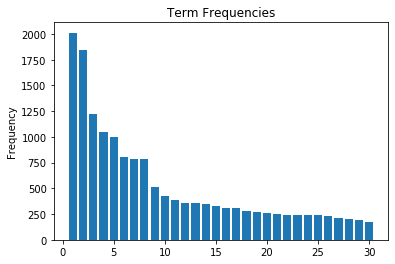

<Figure size 432x288 with 0 Axes>

In [60]:
tweet_tokenizer = TweetTokenizer()
punct = list(string.punctuation)
stopword_list = stopwords.words('english') + punct + ['rt', 'via']

fname = usage()
tf = Counter()

with open(fname, 'r') as f:
    for line in f:
        tweet = json.loads(line)
        tokens = process(text=tweet.get('text', ''),
                            tokenizer=tweet_tokenizer,
                            stopwords=stopword_list)
        tf.update(tokens)
    y = [count for tag, count in tf.most_common(30)]
    x = range(1, len(y)+1)

    plt.bar(x, y)
    plt.title("Term Frequencies")
    plt.ylabel("Frequency")
    plt.savefig('./images/term_distribution.png')
    plt.show()
    plt.tight_layout();

## 11. <a id='twitter_time_series'>twitter_time_series ⏱️</a>
---

In [29]:
import sys
import json
import pandas as pd
import numpy as np
import pickle

from matplotlib import pyplot

In [30]:
from datetime import datetime

In [31]:
def usage():
    fname = str(input("Dame la ruta de el '.jsonl' que extraimos antes: "))
    print("Usage:")
    print("python {} <filename.jsonl>".format(fname))
    return fname

Dame la ruta de el '.jsonl' que extraimos antes: ./json/user_timeline_@EvilAFM.jsonl
Usage:
python ./json/user_timeline_@EvilAFM.jsonl <filename.jsonl>
2020-07-07 08:51:09+00:00    1.0
2020-07-07 08:31:56+00:00    1.0
2020-07-07 08:22:42+00:00    1.0
2020-07-07 08:22:11+00:00    1.0
2020-07-07 08:20:11+00:00    1.0
dtype: float64
2019-12-31 00:00:00+00:00    226.0
2020-01-31 00:00:00+00:00    698.0
2020-02-29 00:00:00+00:00    624.0
2020-03-31 00:00:00+00:00    611.0
2020-04-30 00:00:00+00:00    443.0
Freq: M, dtype: float64


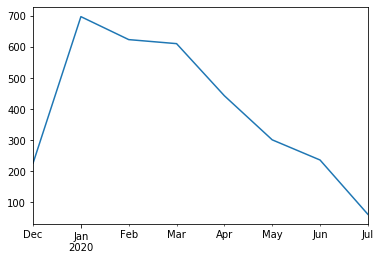

<Figure size 432x288 with 0 Axes>

In [35]:
fname = usage()

with open(fname, 'r') as f:
    all_dates = []
    for line in f:
        tweet = json.loads(line)
        all_dates.append(tweet.get('created_at'))
    ones = np.ones(len(all_dates))
    idx = pd.DatetimeIndex(all_dates)
    # the actual series (at series of 1s for the moment)
    my_series = pd.Series(ones, index=idx)

    # Resampling / bucketing into month buckets
    per_month  = my_series.resample('M').sum()
    print(my_series.head())
    print(per_month.head())
    
    per_month.plot()
    
    plt.savefig('./images/tweet_time_series.png')
    pyplot.show();
    plt.tight_layout();